# Mutual information

In [ ]:
from katlas.data import *

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
from itertools import combinations

In [ ]:
df = Data.get_ks_dataset()

In [ ]:
df = df[df.kinase_uniprot=='P06493']

In [ ]:
import numpy as np
import pandas as pd
from itertools import combinations
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt

# Example peptide sequence input
sequences = df['site_seq'].tolist()  # List of aligned peptide sequences
L = len(sequences[0])  # Peptide length (assumed all same length)

# Convert sequences to character matrix (N_peptides, L)
peptide_position_matrix = np.array([list(seq) for seq in sequences])

# Convert each column to pandas categorical (required for MI calc)
peptide_df = pd.DataFrame(peptide_position_matrix)

# Encode as category for MI (sklearn requires numeric, so we convert categories to codes)
for col in peptide_df.columns:
    peptide_df[col] = pd.Categorical(peptide_df[col]).codes

# Compute mutual information matrix
mi_matrix = np.zeros((L, L))

for i, j in combinations(range(L), 2):
    xi = peptide_df[i].values.reshape(-1, 1)
    xj = peptide_df[j].values
    mi = mutual_info_classif(xi, xj, discrete_features=True)
    mi_matrix[i, j] = mi[0]
    mi_matrix[j, i] = mi[0]  # Make symmetric


In [ ]:
# Step 1: Re-index positions from -20 to +20
L = peptide_df.shape[1]
center_idx = 20  # position 0 is at index 20
pos_labels = [i - 20 for i in range(L)]

# Step 3: Mask the upper triangle
mask = np.triu(np.ones_like(mi_matrix, dtype=bool))

# Step 4: Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(mi_matrix, mask=mask, cmap='viridis',
            xticklabels=pos_labels, yticklabels=pos_labels,
            square=True, cbar_kws={'label': 'Mutual Information'})

plt.title("Mutual Information Between Peptide Positions (excluding Y)")
plt.xlabel("Position (relative to central Y)")
plt.ylabel("Position (relative to central Y)")
plt.tight_layout()
plt.show()

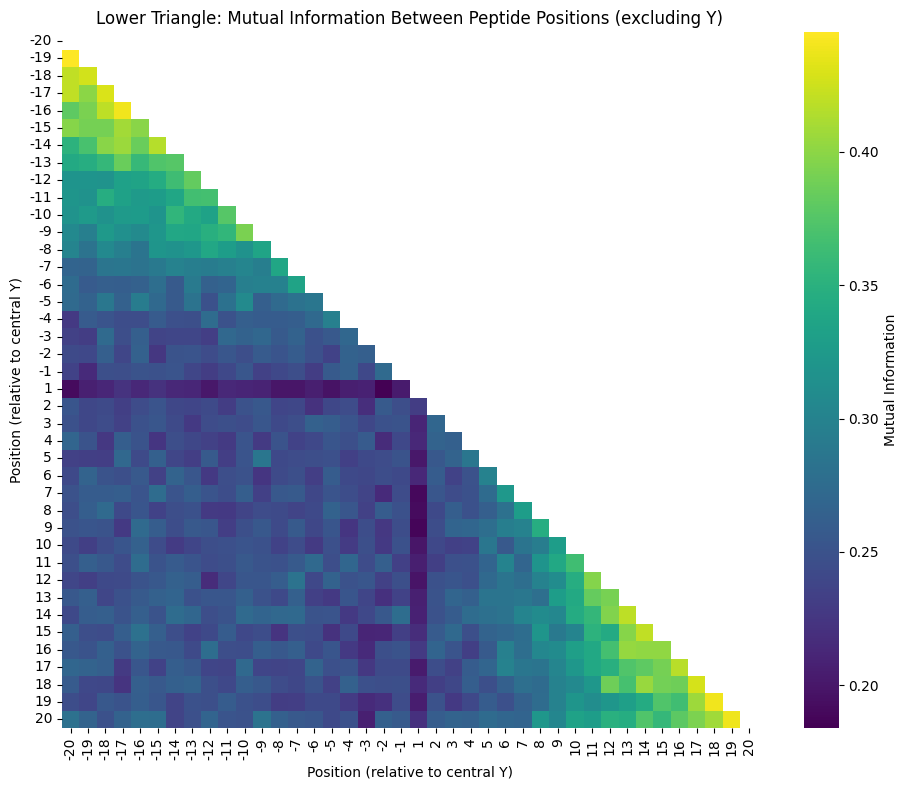

In [ ]:
# Step 1: Re-index positions from -20 to +20
L = peptide_df.shape[1]
center_idx = 20  # position 0 is at index 20
pos_labels = [i - 20 for i in range(L)]

# Step 2: Remove position 0 (row and column from MI matrix and label)
mi_matrix_noY = np.delete(mi_matrix, center_idx, axis=0)
mi_matrix_noY = np.delete(mi_matrix_noY, center_idx, axis=1)
pos_labels_noY = [p for p in pos_labels if p != 0]

# Step 3: Mask the upper triangle
mask = np.triu(np.ones_like(mi_matrix_noY, dtype=bool))

# Step 4: Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(mi_matrix_noY, mask=mask, cmap='viridis',
            xticklabels=pos_labels_noY, yticklabels=pos_labels_noY,
            square=True, cbar_kws={'label': 'Mutual Information'})

plt.title("Mutual Information Between Peptide Positions (excluding Y)")
plt.xlabel("Position (relative to central Y)")
plt.ylabel("Position (relative to central Y)")
plt.tight_layout()
plt.show()